# **Spam mail Classification using Bidirectional LSTM and RNN**

### Introduction
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.
data set can downold click by this link: 

https://www.kaggle.com/team-ai/spam-text-message-classification



## **Overview**
1. **Exploratory Data Analysis (EDA)**
  *  Handle Dummy Variable
  *  Mapping Labels
  *  Dropping Duplicates
  *  Find the Length of each mail
  *  Compare the Spam and Ham mail deviation
  *  Plot Word Cloud
  *  Find the Most Common 20 words for each Case
2. **Data Preprocessing**
  *  Removing Punctuations & Digits
  *  Removing links & Numbers
  *  Convert all character to lower cases
  *  Create the Bag of word
  *  Removing Stopwords
  *  Tokenization & Lemmatization
  *  Count Vectorization
  *  TFIDF

3. **Modelling**
 
  *  How to convert the sentence into word vectors using Keras
  *  Convert to pad_sequences
  *  **Model the Bidirectional LSTM using Tensorflow**
  *  **Model the Basic RNN using Tensorflow**
  *  **How to use word2vec techniques using Gensim**
  * Precision and Recall comparision
  *  ROC curve

4. **Traditional Modelling**

  *  **Logistic Regression**
  *  **Random Forest **
  *  Precision and Recall comparison
  *  ROC curve
  *  Random forest with K-Fold Cross-validation
  *  CV random search with hyperparameter Tuning 



In [139]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Import Necessary Libraries**

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import string 
import re
import warnings
import nltk
import numpy as np
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [141]:
# Read the dataset
url='/content/drive/MyDrive/Google_colab_project/spam.csv'
df=pd.read_csv(url,encoding='latin-1')

In [142]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [143]:
#Drop the unwanted columns
df=df.drop(labels=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [144]:
#change the column name
df = df.rename(columns={"v1":"label", "v2":"text"})

In [145]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [146]:
# Conver catogorical variables to Dummy Variables
for i in df.index:
  if df['label'][i]=="ham":
    df['label'][i]=1
  else:
    df['label'][i]=0

In [147]:
df.head()

,label,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [148]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,1,"Sorry, I'll call later"
freq,4825,30


Here, we can use in the mail "Sorry, I'll call later" to appear more time than in other sentences.

Text(0.5, 1.0, 'Spam vs Non Spam')

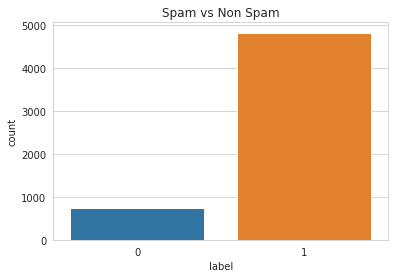

In [149]:
#Spam vs Non Spam Distribution
sns.countplot(df.label)
plt.title("Spam vs Non Spam")

In [150]:
#Describe about ham and Spam Mail Behavior in all data set
df.groupby ('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
0       747    653  Please call our customer service representativ...    4
1      4825   4516                             Sorry, I'll call later   30

By getting describe regarding the label, it's showing 4852 ham messages (4516 unique) and 747 spam messages (653 unique). So, It's mean we have some duplicate observation in our data set.

In [151]:
# describing the SPAM Mails
df[df.label == 0].describe()

,label,text
count,747,747
unique,1,653
top,0,Please call our customer service representativ...
freq,747,4


In [152]:
# describing the HAM Mails
df[df.label == 1].describe()

,label,text
count,4825,4825
unique,1,4516
top,1,"Sorry, I'll call later"
freq,4825,30


In [153]:
#dropping duplicate rows
df=df.drop_duplicates()


In [154]:
df.groupby ('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
0       653    653  Double Mins & Double Txt & 1/2 price Linerenta...    1
1      4516   4516  Omg you can make a wedding chapel in frontierv...    1

By getting describe regarding the label, it's showing 4516 ham messages (4516 unique) and 653 spam messages (653 unique). So, It's mean we don't have any duplicate observation in our data set.

#### **Find length of each sentences**

In [155]:
df['word_length'] = df['text'].apply(lambda x:len(x.split()))

In [156]:
df.head()

,label,text,word_length
0,1,"Go until jurong point, crazy.. Available only ...",20
1,1,Ok lar... Joking wif u oni...,6
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,1,U dun say so early hor... U c already then say...,11
4,1,"Nah I don't think he goes to usf, he lives aro...",13


In [157]:
print("Spam message length describe"+ "\n"+str(df[df['label']==0].describe()))
print("Ham message length describe"+ "\n"+str(df[df['label']==1].describe()))

Spam message length describe
       word_length
count   653.000000
mean     23.681470
std       5.967672
min       2.000000
25%      22.000000
50%      25.000000
75%      28.000000
max      35.000000
Ham message length describe
       word_length
count  4516.000000
mean     14.134632
std      11.116240
min       1.000000
25%       7.000000
50%      11.000000
75%      18.000000
max     171.000000


Text(0.5, 1.0, 'Spam message length distribution')

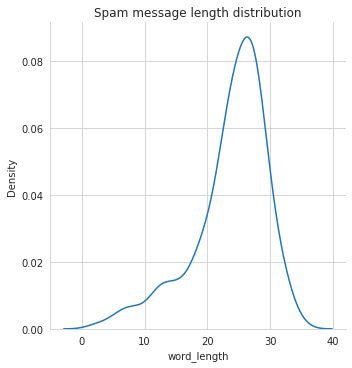

In [158]:
sns.displot(df[df.label==0].word_length,kind='kde')
sns.set_style(style='whitegrid')
plt.title("Spam message length distribution")

Text(0.5, 1.0, 'Ham message length distribution')

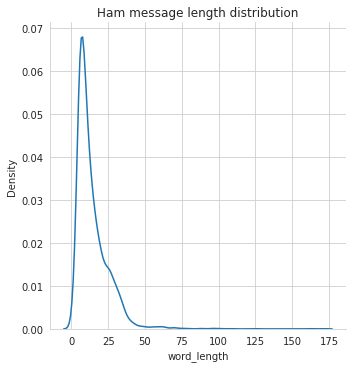

In [159]:
sns.displot(df[df.label==1].word_length,kind='kde')
sns.set_style(style='whitegrid')
plt.title("Ham message length distribution")

### **Data Preprocessing**

Pre-processing mails
This is one of the essential steps in any natural language processing (NLP) task. Data scientists never get filtered, ready-to-use data. To make it workable, there is a lot of processing that needs to happen.So the basic steps involved in cleaning the data are

1. Converting the text from upper case to lower case
2. Correcting the spelling mistakes
3. Punctuation removal
4. removes unwanted characters e.g. hashtag, hyperlinks, stock tickers and number from tweet
5. Stop words removal
6. Normalization via lemmatization or stemming
Tokenization
Now let’s discuss all of these in detail. There are no standard sequences or standard steps that are involved. They vary from example to example. Let us now import the dataset, and analyze it to get a basic understanding of it.

The goal of Text Preprocessing is to convert the text in a form that is easy to process and analyze.
It helps us get rid of unwanted data & noise by removing punctuations/digits/stopwords, converting to lower case, etc.

In [160]:
 message=df.copy()
message.reset_index(inplace=False)

,index,label,text,word_length
0,0,1,"Go until jurong point, crazy.. Available only ...",20
1,1,1,Ok lar... Joking wif u oni...,6
2,2,0,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,3,1,U dun say so early hor... U c already then say...,11
4,4,1,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...,...
5164,5567,0,This is the 2nd time we have tried 2 contact u...,30
5165,5568,1,Will Ì_ b going to esplanade fr home?,8
5166,5569,1,"Pity, * was in mood for that. So...any other s...",10
5167,5570,1,The guy did some bitching but I acted like i'd...,26


In [161]:
#Remove puncuation, newlines and multiple whitespace, lower case everything etc..
ps=PorterStemmer()
df['cleaned_text']=""
corpus=[]
for i in df.index:
  #1.remove except a to z and A to Z 
  review=re.sub('[^a-zA-Z]',' ',df['text'][i])
  #2.Remove all puncuation
  review = re.sub('[\(].*?[\)]', '', review)
  # 2. remove newlines and multiple whitespace, lower case everything
  review = re.sub('\s+', ' ', review)
# 4. remove special characters
  # Regex to keep . , and ' is [^A-Za-z0-9.,\' ]
  review = re.sub('[^A-Za-z0-9 ]', '', review)
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)
  #df['cleaned_text']=np.array(corpus)


In [252]:
print(corpus[:100])

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'search right word thank breather promis wont 

In [163]:
#Convert corpus to array
import numpy as np
df['cleaned_text']=np.array(corpus)

In [164]:
df.head()

,label,text,word_length,cleaned_text
0,1,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,6,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entri wkli comp win fa cup final tkt st m...
3,1,U dun say so early hor... U c already then say...,11,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",13,nah think goe usf live around though


### **Cleaned Spam message Analysis**

In [165]:
## Seperate Spam message
spam=list(df[df['label']==0]['cleaned_text'])
#print(Data.Frame(spam))

# **Tokenization for spam message**

In [166]:
#Spam mail words
from nltk.tokenize import word_tokenize
all_word_spam=[]
for sentence in spam:
    words=word_tokenize(sentence)
    for word in words:
        all_word_spam.append(word)

### **Find most Twenty common words that appeared in Spam Message**

In [167]:
from collections import Counter
counter_spam=Counter(all_word_spam)
print(counter_spam.most_common(20))
coun_spam=pd.DataFrame(counter_spam.most_common(20))
coun_spam.columns=['Common_Words','count']
coun_spam.style.background_gradient(cmap='Blues')
coun_spam

[('call', 346), ('free', 197), ('p', 158), ('u', 157), ('txt', 152), ('text', 129), ('mobil', 121), ('ur', 119), ('stop', 114), ('repli', 104), ('claim', 98), ('prize', 85), ('www', 83), ('min', 78), ('get', 75), ('tone', 73), ('cash', 65), ('servic', 65), ('new', 64), ('uk', 63)]


,Common_Words,count
0,call,346
1,free,197
2,p,158
3,u,157
4,txt,152
5,text,129
6,mobil,121
7,ur,119
8,stop,114
9,repli,104


In [168]:
##Plot Most Common words that appeared in mail
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
fig = px.bar(coun_spam, x="count", y="Common_Words", title='Commmon Words in spam mail', orientation='h', 
             width=700, height=700,color="Common_Words")
fig.show()

### **Plot The Word Cloud for Spam Message**

We extract the most frequently used words in the spam mail and then based on the number of times a word is used.
Greater the usage, greater the size of the word in the word cloud.

In [169]:
from wordcloud import WordCloud,STOPWORDS

In [170]:
##Define function for Plot Word Cloud
def plot_wordcloud(text):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(max_font_size=300,width=800, height=600).generate(str(text))
# Open a plot of the generated image.

    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title('WordCloud of spam mail')
    plt.show()

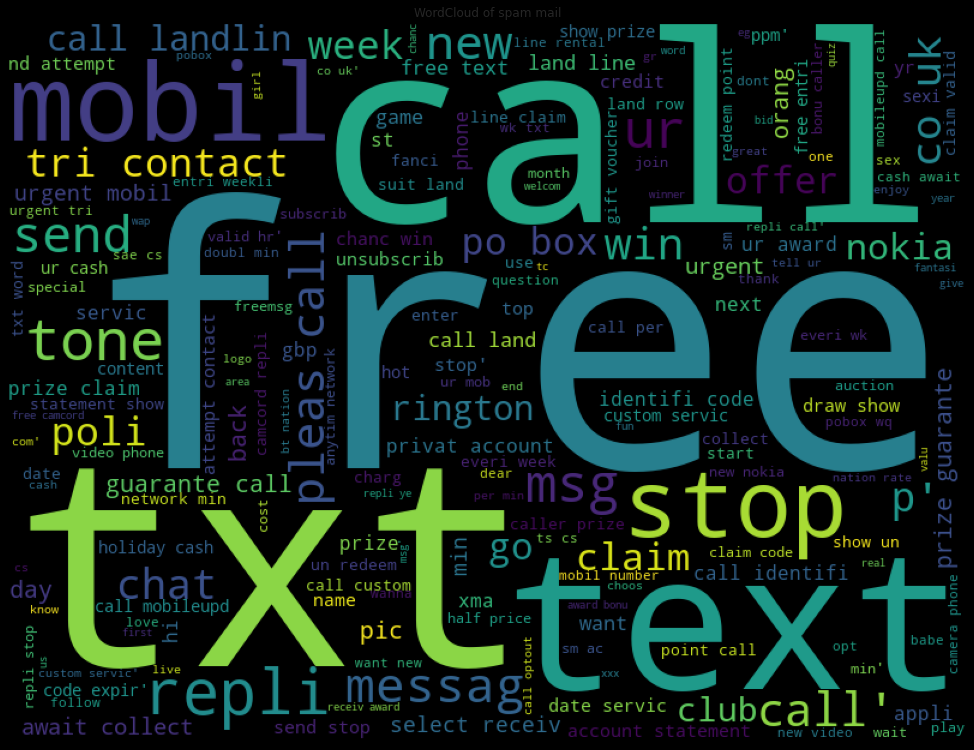

In [171]:
plot_wordcloud(spam)


### **Most Common words appeared in Ham mail**

In [172]:
#Seperate the label unique values as 1

ham=list(df[df['label']==1]['cleaned_text'])

### **Tokenization for spam mail**

In [173]:
#Ham mail words
from nltk.tokenize import word_tokenize
all_word_ham=[]
for sentence in ham:
    words=word_tokenize(sentence)
    for word in words:
        all_word_ham.append(word)

### **Find most Twenty common words appered in Ham Message**

In [174]:
from collections import Counter
counter_ham=Counter(all_word_ham)
print(counter_ham.most_common(20))
coun_ham=pd.DataFrame(counter_ham.most_common(20))
coun_ham.columns=['Common_Words','count']
coun_ham.style.background_gradient(cmap='Blues')
coun_ham.head(20)

[('u', 922), ('go', 409), ('get', 358), ('gt', 288), ('lt', 287), ('come', 277), ('ok', 255), ('call', 240), ('got', 239), ('like', 236), ('know', 236), ('time', 225), ('love', 225), ('day', 218), ('good', 216), ('want', 210), ('ur', 198), ('need', 174), ('one', 165), ('lor', 159)]


,Common_Words,count
0,u,922
1,go,409
2,get,358
3,gt,288
4,lt,287
5,come,277
6,ok,255
7,call,240
8,got,239
9,like,236


In [175]:
fig = px.bar(coun_ham, x="count", y="Common_Words", title='Commmon Words in Ham mail', orientation='h', 
             width=700, height=700,color="Common_Words")
fig.show()

### **Most Common Words In coprus(All Mails)**

In [176]:
from nltk.tokenize import word_tokenize
all_word=[]
for sentence in corpus:
    words=word_tokenize(sentence)
    for word in words:
        all_word.append(word)

In [177]:
from collections import Counter
counter=Counter(all_word)
print(counter.most_common(20))
coun=pd.DataFrame(counter.most_common(20))
coun.columns=['Common_Words','count']
coun.style.background_gradient(cmap='Blues')
coun.head(20)

[('u', 1079), ('call', 586), ('go', 443), ('get', 433), ('ur', 317), ('gt', 288), ('lt', 287), ('come', 282), ('ok', 260), ('know', 255), ('free', 253), ('day', 252), ('like', 248), ('got', 245), ('time', 243), ('want', 241), ('love', 235), ('good', 228), ('text', 215), ('need', 185)]


,Common_Words,count
0,u,1079
1,call,586
2,go,443
3,get,433
4,ur,317
5,gt,288
6,lt,287
7,come,282
8,ok,260
9,know,255


In [178]:
fig = px.bar(coun, x="count", y="Common_Words", title='Commmon Words in spam mail', orientation='h', 
             width=700, height=700,color="Common_Words")
fig.show()

### **Plot The Word Cloud for Ham Message**

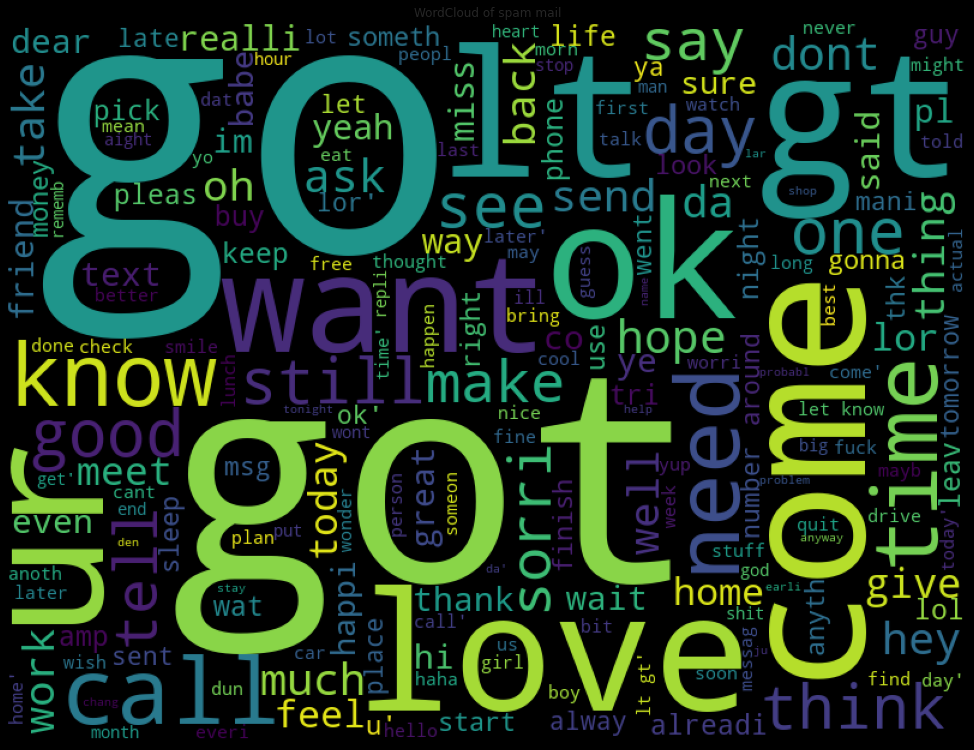

In [179]:
#For ploting use created function
plot_wordcloud(ham)

Up to now we analysed related to spam message and ham message and next, we will see how to develop the model for the classification of either mail spam or ham

### **Model for classification** 

In [180]:
from sklearn import model_selection
#splitting the data (80:20 ratio)
x_train,x_test,y_train,y_test=model_selection.train_test_split(df['cleaned_text'],df['label'].astype(int),test_size=0.2,stratify=df['label'],random_state=100)
print("Training data set independent features contain " + " " + str(len(x_train))+ " "+ "Observation")
print("Testing data set contain  " + " " + str(len(y_test))+ " "+ "Observation")

Training data set independent features contain  4135 Observation
Testing data set contain   1034 Observation


### **Spam classification with lstm and word2vec**

In [181]:
#The tokenizer Class to convert the sentences into word vectors
from keras.preprocessing.text import Tokenizer
num_words = 12000 # this means 12000 unique words can be taken 
tokenizer=Tokenizer(num_words,lower=True)
df_total = df['cleaned_text']
#pd.concat([x_train, x_test], axis = 0)
tokenizer.fit_on_texts(df_total)

In [182]:
#Find the tokenizer word_index
len(tokenizer.word_index)

6239

Where we have taken 12000 words but we have only 6239 and the rest will be zero

In [183]:
df['word_length'].max()

171

### Pad_sequences PreProcessing


In [184]:
from keras.preprocessing.sequence import pad_sequences

x_train_    =tokenizer.texts_to_sequences(x_train)
x_train_pad =pad_sequences(x_train_,maxlen=171,padding='post')
x_test_     = tokenizer.texts_to_sequences(x_test)
x_test_pad  = pad_sequences(x_test_, maxlen = 171, padding = 'post')

In [185]:
#Find the shape of test data and train_pad data
print(x_train_pad.shape,x_test_pad.shape)

(4135, 171) (1034, 171)


In [186]:
#Import Tensorflow important libraries
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout

In [187]:
#Developing the basic LSTM model
EMBEDDING_DIM = 100 # this means the embedding layer will create  a vector in 100 dimension
model = Sequential()
model.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= x_train_pad.shape[1] # max_len of text sequence
                          ))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences=False)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [188]:
#EarlyStopping and ModelCheckpoint

from keras.callbacks import EarlyStopping, ModelCheckpoint


es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [189]:
history_embedding = model.fit(x_train_pad,y_train, epochs = 35, batch_size = 120,
                            validation_data=(x_test_pad,y_test.to_numpy().astype(int)),verbose = 1, callbacks= [es, mc])

Epoch 1/35
35/35 [==============================] - 9s 149ms/step - loss: 0.3830 - accuracy: 0.8922 - val_loss: 0.0865 - val_accuracy: 0.9797

Epoch 00001: val_accuracy improved from -inf to 0.97969, saving model to ./model.h5
Epoch 2/35
35/35 [==============================] - 4s 127ms/step - loss: 0.0609 - accuracy: 0.9853 - val_loss: 0.0571 - val_accuracy: 0.9845

Epoch 00002: val_accuracy improved from 0.97969 to 0.98453, saving model to ./model.h5
Epoch 3/35
35/35 [==============================] - 4s 127ms/step - loss: 0.0239 - accuracy: 0.9946 - val_loss: 0.0625 - val_accuracy: 0.9826

Epoch 00003: val_accuracy did not improve from 0.98453
Epoch 4/35
35/35 [==============================] - 4s 127ms/step - loss: 0.0097 - accuracy: 0.9980 - val_loss: 0.1374 - val_accuracy: 0.9778

Epoch 00004: val_accuracy did not improve from 0.98453
Epoch 5/35
35/35 [==============================] - 4s 128ms/step - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.0734 - val_accuracy: 0.9816

Epoc

### **Plot Training Acuuracy vs Test Accuracy**

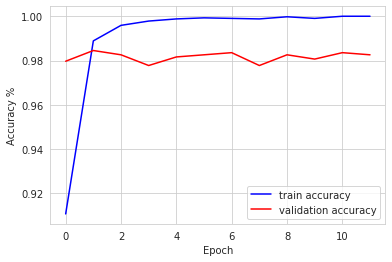

In [190]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.legend(loc='lower right')
plt.show()

### Predict the Test data set classification

In [191]:
y_pred = np.where(model.predict(x_test_pad)>.5,1,0)

In [192]:
model.evaluate(x_test_pad, y_test)


33/33 [==============================] - 1s 20ms/step - loss: 0.0925 - accuracy: 0.9826


[0.09245657175779343, 0.9825918674468994]

In [193]:
# Grt the classification report
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       129
           1       0.99      0.99      0.99       905

    accuracy                           0.98      1034
   macro avg       0.96      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [194]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix_model=confusion_matrix(y_test,y_pred_gin)

Text(69.0, 0.5, 'Truth')

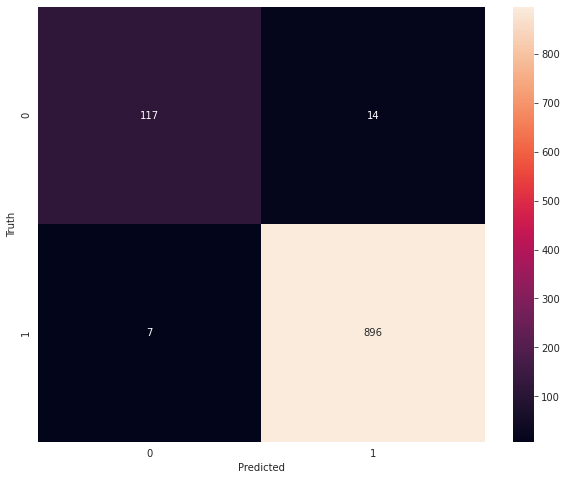

In [195]:
# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix_model,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [196]:
from sklearn.metrics import precision_recall_curve,average_precision_score,roc_auc_score
average_precision_model= average_precision_score(y_test,y_pred_gin)

print(average_precision_model)

0.9837525331340274


In [197]:
precision_model, recall_model,thresholds_model = precision_recall_curve(y_test,y_pred_gin)
print("precision:"+ str(precision_model) + " \n"+"recall:"+str( recall_model)+"\n"+"thresholds:"+ str(thresholds_model))

precision:[0.87330754 0.98461538 1.        ] 
recall:[1.         0.99224806 0.        ]
thresholds:[0 1]


### **Define function for ploting ROC curve**

In [198]:
def plot_pr_curve(recall, precision, average_precision):
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall, precision, color='g', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='g', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
    return plt.show()

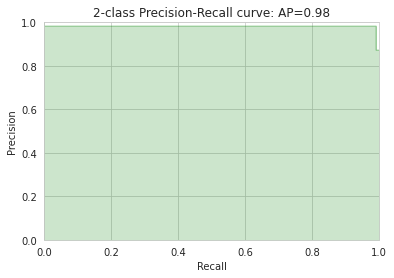

In [199]:
# Plot the recall precision tradeoff
from sklearn.metrics import r2_score, roc_auc_score, roc_curve
plot_pr_curve(recall_model, precision_model, average_precision_model)

the maximum accurary we have got with wordembedding is 98 with some overfitting now we would try with word2vec

Now, Here we can see the accuracy of the training data set arround 100% and the testing data set accuracy arround 98.75. So, It's seem like over fitting so , we have to care on about the over fitting.So, we are gonna try with word2vec techniques and see how much the accuracy?





### **LSTM with word2vec techniques**

In [200]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') # this would download vector with 100 dimension

In [201]:
# Define the diemnsion of the vectors
glove_gensim['cat'].shape[0] 

100

In [202]:
# now lets convert all the words into vectors 
vector_size = 100
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.wv.vocab:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [203]:
#Check the shape of the weight matrix
gensim_weight_matrix.shape


(12000, 100)

In [204]:
# designing our architecture 
EMBEDDING_DIM = 100 # this means the embedding layer will create  a vector in 100 dimension
model_gensim = Sequential()
model_gensim.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= x_train_pad.shape[1], # max_len of text sequence
                          weights = [gensim_weight_matrix],trainable = False))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(100,return_sequences=False)))
model_gensim.add(Dense(1, activation = 'sigmoid'))
model_gensim.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [205]:
model_gensim.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 171, 100)          1200000   
_________________________________________________________________
dropout_12 (Dropout)         (None, 171, 100)          0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 171, 200)          161600    
_________________________________________________________________
dropout_13 (Dropout)         (None, 171, 200)          0         
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 171, 400)          643200    
_________________________________________________________________
dropout_14 (Dropout)         (None, 171, 400)          0         
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 200)              

In [206]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model_gensim.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)


In [207]:
history_gensim = model_gensim.fit(x_train_pad,y_train, epochs = 25, batch_size = 120, validation_data=(x_test_pad, y_test),verbose = 1, callbacks= [es, mc]  )

Epoch 1/25
35/35 [==============================] - 8s 139ms/step - loss: 0.3623 - accuracy: 0.8275 - val_loss: 0.1430 - val_accuracy: 0.9458

Epoch 00001: val_accuracy improved from -inf to 0.94584, saving model to ./model_gensim.h5
Epoch 2/25
35/35 [==============================] - 4s 119ms/step - loss: 0.1159 - accuracy: 0.9599 - val_loss: 0.1013 - val_accuracy: 0.9700

Epoch 00002: val_accuracy improved from 0.94584 to 0.97002, saving model to ./model_gensim.h5
Epoch 3/25
35/35 [==============================] - 4s 119ms/step - loss: 0.0707 - accuracy: 0.9775 - val_loss: 0.0846 - val_accuracy: 0.9700

Epoch 00003: val_accuracy did not improve from 0.97002
Epoch 4/25
35/35 [==============================] - 4s 119ms/step - loss: 0.0722 - accuracy: 0.9778 - val_loss: 0.1046 - val_accuracy: 0.9652

Epoch 00004: val_accuracy did not improve from 0.97002
Epoch 5/25
35/35 [==============================] - 4s 119ms/step - loss: 0.0740 - accuracy: 0.9777 - val_loss: 0.1074 - val_accuracy

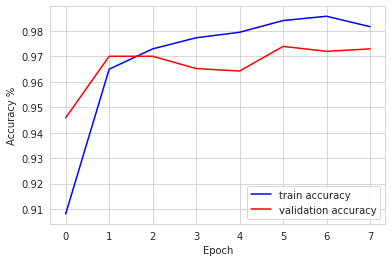

In [208]:
# lets draw learning curve 

plt.plot(history_gensim.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_gensim.history['val_accuracy'],c='r',label='validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.legend(loc='lower right')
plt.show()

In [209]:
y_pred_gin = np.where(model.predict(x_test_pad)>.5,1,0)

model trained with word2vec is more generalised model so we will choose that as our final model

In [210]:
model_gensim.evaluate(x_test_pad, y_test)[1]

33/33 [==============================] - 1s 20ms/step - loss: 0.0862 - accuracy: 0.9729


0.9729207158088684

In [211]:
print(metrics.classification_report(y_pred_gin, y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       129
           1       0.99      0.99      0.99       905

    accuracy                           0.98      1034
   macro avg       0.96      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [212]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix_gin=confusion_matrix(y_test,y_pred_gin)

Text(69.0, 0.5, 'Truth')

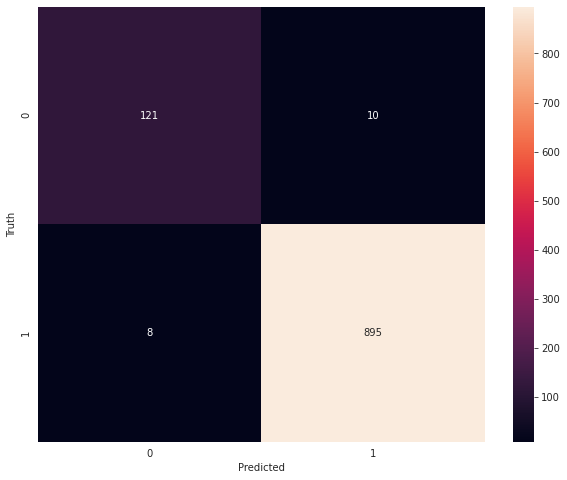

In [213]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix_gin,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [214]:
from sklearn.metrics import precision_recall_curve,average_precision_score,roc_auc_score
average_precision_gin= average_precision_score(y_test,y_pred_gin)

print(average_precision_gin)

0.9879257559088943


In [215]:
precision_gin, recall_gin,thresholds_gin = precision_recall_curve(y_test,y_pred_gin)
print("precision:"+ str(precision_gin) + " \n"+"recall:"+str( recall_gin)+"\n"+"thresholds:"+ str(thresholds_gin))

precision:[0.87330754 0.98895028 1.        ] 
recall:[1.         0.99114064 0.        ]
thresholds:[0 1]


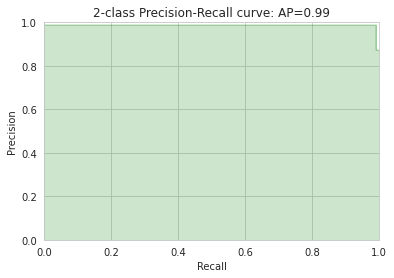

In [216]:
# Plot the recall precision tradeoff
from sklearn.metrics import r2_score, roc_auc_score, roc_curve
plot_pr_curve(recall_gin, precision_gin, average_precision_gin)

### **Model Comparission**

In [217]:
print("LSTM Accuracy with out word2vec"+ " "+ str(model.evaluate(x_test_pad, y_test)[1]))
print("LSTM Accuracy with word2vec"+ " "+ str(model_gensim.evaluate(x_test_pad, y_test)[1]))


33/33 [==============================] - 1s 20ms/step - loss: 0.0925 - accuracy: 0.9826
LSTM Accuracy with out word2vec 0.9825918674468994
33/33 [==============================] - 1s 21ms/step - loss: 0.0862 - accuracy: 0.9729
LSTM Accuracy with word2vec 0.9729207158088684


 **From, Here we can see how was accuracy change when we used the word2vec method. So, In this problem, Word2vec with Bidirectional LSTM has good performance than LSTM.**

### Spam classification Model Simple RNN





In [218]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense


model_rnn = Sequential()
model_rnn.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= x_train_pad.shape[1], # max_len of text sequence
                          trainable = False))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model_rnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 171, 100)          1200000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                4256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,204,289
Trainable params: 4,289
Non-trainable params: 1,200,000
_________________________________________________________________


In [219]:
history_rnn = model_rnn.fit(x_train_pad,y_train, epochs = 25, batch_size = 120, validation_data=(x_test_pad, y_test),verbose = 1)

Epoch 1/25
35/35 [==============================] - 5s 121ms/step - loss: 0.4882 - accuracy: 0.7791 - val_loss: 0.3803 - val_accuracy: 0.8733
Epoch 2/25
35/35 [==============================] - 4s 114ms/step - loss: 0.3944 - accuracy: 0.8662 - val_loss: 0.3803 - val_accuracy: 0.8733
Epoch 3/25
35/35 [==============================] - 4s 110ms/step - loss: 0.3703 - accuracy: 0.8788 - val_loss: 0.3839 - val_accuracy: 0.8733
Epoch 4/25
35/35 [==============================] - 4s 112ms/step - loss: 0.3800 - accuracy: 0.8745 - val_loss: 0.3806 - val_accuracy: 0.8733
Epoch 5/25
35/35 [==============================] - 4s 111ms/step - loss: 0.3883 - accuracy: 0.8699 - val_loss: 0.3841 - val_accuracy: 0.8733
Epoch 6/25
35/35 [==============================] - 4s 115ms/step - loss: 0.3801 - accuracy: 0.8743 - val_loss: 0.3818 - val_accuracy: 0.8733
Epoch 7/25
35/35 [==============================] - 4s 110ms/step - loss: 0.3896 - accuracy: 0.8691 - val_loss: 0.3811 - val_accuracy: 0.8733
Epoch 

**Commonly, we know LSTM has good performance with Text than RNN. So, here we can see LSTM has good accuracy rathe than RNN.**

### **Conclusion 1**
In our model performance, we could tell Bidirectional LSTM has good performance among all model. Also, LSTM well work with word2vec for this problem and It will avoid overfitting So, I would say Bidirectional has the best performance for deal with test data.


### **Traditional Modeling algorithm **
Next part we will see ho will accuracy and how can deal with our traditional algorithms with spam classification.

**Logistic Regression**

 Random Forest
**bold text**

### **Count Vectorization**


These words need to then be encoded as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is called feature vectorization. Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts.


In [220]:
#count vectorization 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
cv=CountVectorizer(max_features=2500)
train_vector=cv.fit_transform(x_train).toarray()
test_vector=cv.fit_transform(x_test).toarray()

In [221]:
train_vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [222]:
print(train_vector)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### **TF-IDF(Term Frequency-Inverse Document Frequency)**

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [223]:
#tfidf
tf=TfidfTransformer()
train_tfidf=tf.fit_transform(train_vector)
test_tfidf=tf.fit_transform(test_vector)

In [224]:
train_k=pd.DataFrame(train_tfidf.toarray(),x_train.index)
test_k=pd.DataFrame(test_tfidf.toarray(),x_test.index)

In [225]:
train_k['label']=""
for i in train_k.index:
  for j in y_train.index:
    if i ==j:
      train_k['label'][i]=y_train[j]

In [226]:
test_k['label']=""
for i in test_k.index:
  for j in y_test.index:
    if i ==j:
      test_k['label'][i]=y_test[j]

In [227]:
print(train_k)

        0    1    2    3    4    5  ...  2495  2496  2497  2498  2499  label
3536  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0      1
5213  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0      1
369   0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0      1
1499  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0      0
1403  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0      1
...   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...    ...
1525  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0      1
3590  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0      1
2946  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0      1
1821  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0      1
74    0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0      1

[4135 rows x 2501 columns]


In [228]:
#converting the labels to int datatype (for model training)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [229]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 100)
classifier.fit(train_k.iloc[:,:-1], train_k['label'].astype(int))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [230]:
# Predicting the Test set results
predict_log = classifier.predict(test_k.iloc[:,:-1])
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Making the confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
c=confusion_matrix(test_k['label'].astype(int),predict_log)
print(c)
#accuracy_score(y_test,predict_log)


[[  0 131]
 [  1 902]]


In [231]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import classification_report
report1 = classification_report(test_k['label'].astype(int), predict_log)
print("accuracy of the train data set" + " "+ str(accuracy_score(test_k['label'].astype(int),predict_log)))
print(report1)

accuracy of the train data set 0.8723404255319149
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.87      1.00      0.93       903

    accuracy                           0.87      1034
   macro avg       0.44      0.50      0.47      1034
weighted avg       0.76      0.87      0.81      1034



Text(69.0, 0.5, 'Truth')

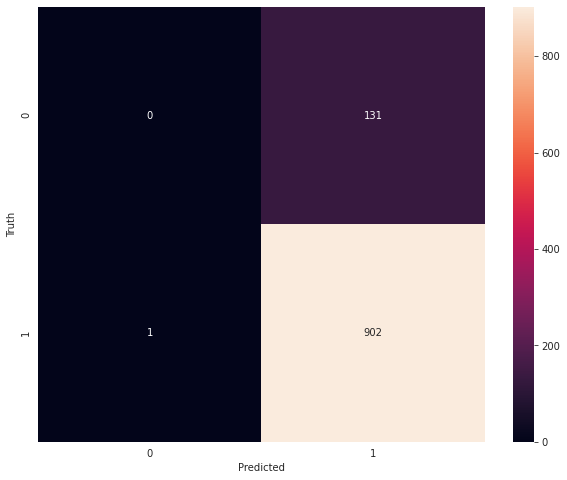

In [232]:
plt.figure(figsize=(10,8))
sns.heatmap(c,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [233]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=100,n_estimators=20,class_weight='balanced_subsample')
model_rf=rf.fit(train_k.iloc[:,:-1], train_k['label'].astype(int))
rf_predict=model_rf.predict(test_k.iloc[:,:-1])


In [234]:
#Confusion Matrix
con_matrix_rf = confusion_matrix(test_k['label'].astype(int), rf_predict)
classification_report_rf=classification_report(test_k['label'].astype(int),rf_predict)
print("accuracy of the train data set" + " "+ str(accuracy_score(train_k['label'].astype(int),model_rf.predict(train_k.iloc[:,:-1]))))
print("accuracy of the test data set" + " "+ str(accuracy_score(test_k['label'].astype(int),rf_predict)))
print(classification_report_rf)


accuracy of the train data set 0.9995163240628778
accuracy of the test data set 0.851063829787234
              precision    recall  f1-score   support

           0       0.07      0.02      0.03       131
           1       0.87      0.97      0.92       903

    accuracy                           0.85      1034
   macro avg       0.47      0.49      0.47      1034
weighted avg       0.77      0.85      0.81      1034



Text(69.0, 0.5, 'Truth')

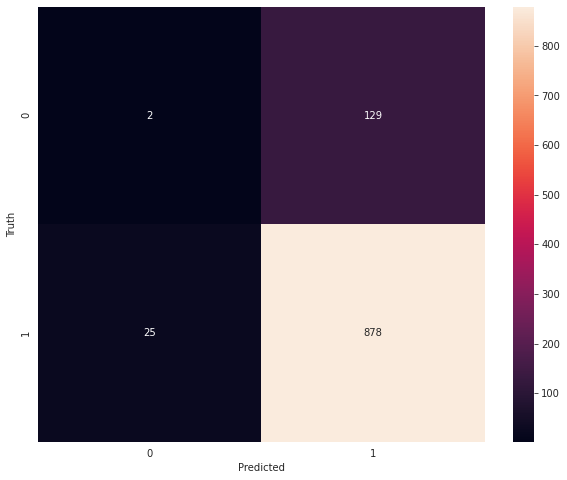

In [235]:
plt.figure(figsize=(10,8))
sns.heatmap(con_matrix_rf,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now obtained more meaningful performance metrics that tell us how well the model performs. Our model has predicted as false negative values as 12. This is good, and as a result, you have a very high precision score. however, model has missed predict 123 spam mail as ham mail. The recall is therefore not as good as precision. Anyhow we have to consider false negative values as much as possible So, we have to consider true negative predicted values. So, Let's now explore whether we can improve the prediction results even further with others tuning the Random Forest algorithm.

### **Precision and Recall Curve**

In [236]:
from sklearn.metrics import precision_recall_curve,average_precision_score,roc_auc_score
average_precision= average_precision_score(test_k['label'].astype(int),rf_predict)

print(average_precision)

0.8719357822024607


In [237]:
precision, recall,thresholds = precision_recall_curve(test_k['label'].astype(int),rf_predict)
print("precision:"+ str(precision) + " \n"+"recall:"+str( recall)+"\n"+"thresholds:"+ str(thresholds))

precision:[0.87330754 0.87189672 1.        ] 
recall:[1.         0.97231451 0.        ]
thresholds:[0 1]


### **Plot the recall precision tradeoff**

In [238]:
def plot_pr_curve(recall, precision, average_precision):
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall, precision, color='g', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='g', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
    return plt.show()

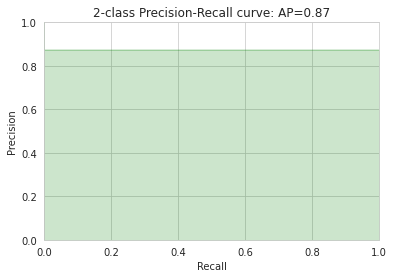

In [239]:
# Plot the recall precision tradeoff
from sklearn.metrics import r2_score, roc_auc_score, roc_curve
plot_pr_curve(recall, precision, average_precision)

In [240]:
def get_result(train: np.ndarray,y_train: np.ndarray,
               test: np.ndarray,y_test: np.ndarray,model_rf_cv):
  model_rf_cv.fit(train,y_train)
  predict_cv=model_rf_cv.predict(test)
  try:
    probs = model_rf_cv.predict_proba(test)
    print('ROC Score:')
    print(roc_auc_score(y_test, probs[:,1]))
  except AttributeError:
    pass
  print('\nClassification Report:')
  print(classification_report(y_test, predict_cv))
  print('\nConfusion Matrix:')
  print(confusion_matrix(y_test, predict_cv))

In [241]:
# Change the model options
model_rf_cv = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12},
                               criterion='gini',
                               # Change depth of model
                               max_depth=10,
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=20, 
                               # Change the number of trees to use
                               n_estimators=40,
                               n_jobs=-1,
                               random_state=100)

# Run the function get_model_results
get_result(train_k.iloc[:,:-1], train_k['label'].astype(int),test_k.iloc[:,:-1], test_k['label'].astype(int), model_rf_cv)

ROC Score:
0.5484897669346454

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.87      1.00      0.93       903

    accuracy                           0.87      1034
   macro avg       0.44      0.50      0.47      1034
weighted avg       0.76      0.87      0.81      1034


Confusion Matrix:
[[  0 131]
 [  0 903]]


### **Parameter optimization with GridSearchCV**

In [242]:
from sklearn.model_selection import GridSearchCV
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=100)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(train_k.iloc[:,:-1], train_k['label'].astype(int))
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 30}

### **Model results with GridSearchCV**

In [243]:
# # Input the optimal parameters in the model
model_results = RandomForestClassifier(class_weight={0:1,1:12},
                               criterion='gini',
                               max_depth=4,
                               max_features='auto', 
                               min_samples_leaf=10,
                               n_estimators=30,
                               n_jobs=-1,
                               random_state=100)

# Get results from your model
get_result(train_k.iloc[:,:-1], train_k['label'].astype(int),test_k.iloc[:,:-1], test_k['label'].astype(int), model_rf_cv)

ROC Score:
0.5484897669346454

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.87      1.00      0.93       903

    accuracy                           0.87      1034
   macro avg       0.44      0.50      0.47      1034
weighted avg       0.76      0.87      0.81      1034


Confusion Matrix:
[[  0 131]
 [  0 903]]


### **Multinomial Naive Bayes**

In [244]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(train_k.iloc[:,:-1], train_k['label'].astype(int))
y_preds=model.predict(test_k.iloc[:,:-1])
print("Multinomial Naive Bayes:"+ str(accuracy_score(test_k['label'].astype(int),y_preds)))

Multinomial Naive Bayes:0.8239845261121856


In [245]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_k.iloc[:,:-1], train_k['label'].astype(int))


GaussianNB(priors=None, var_smoothing=1e-09)

In [246]:
# Predicting the Test set results
nb_predict = classifier.predict(test_k.iloc[:,:-1])


In [247]:
#Confusion Matrix
con_matrix_nb = confusion_matrix(test_k['label'].astype(int), rf_predict)
classification_report_nb=classification_report(test_k['label'].astype(int),nb_predict)
print("accuracy of the train data set" + " "+ str(accuracy_score(train_k['label'].astype(int),classifier.predict(train_k.iloc[:,:-1]))))
print("accuracy of the test data set" + " "+ str(accuracy_score(test_k['label'].astype(int),nb_predict)))
print(classification_report_nb)

accuracy of the train data set 0.8950423216444982
accuracy of the test data set 0.7978723404255319
              precision    recall  f1-score   support

           0       0.09      0.06      0.07       131
           1       0.87      0.90      0.89       903

    accuracy                           0.80      1034
   macro avg       0.48      0.48      0.48      1034
weighted avg       0.77      0.80      0.78      1034



Text(69.0, 0.5, 'Truth')

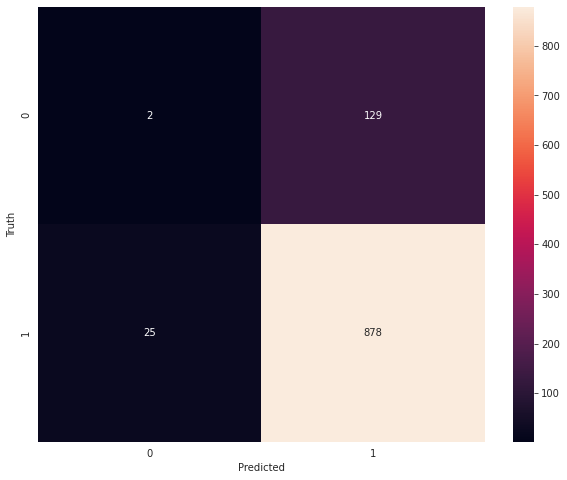

In [248]:
plt.figure(figsize=(10,8))
sns.heatmap(con_matrix_nb,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [249]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 100)
classifier.fit(train_k.iloc[:,:-1], train_k['label'].astype(int))
# Predicting the Test set results
svm_predict = classifier.predict(test_k.iloc[:,:-1])

In [250]:
#Confusion Matrix

con_matrix_svm = confusion_matrix(test_k['label'].astype(int), svm_predict)
classification_report_svm=classification_report(test_k['label'].astype(int),svm_predict)
print("accuracy of the train data set" + " "+ str(accuracy_score(train_k['label'].astype(int),classifier.predict(train_k.iloc[:,:-1]))))
print("accuracy of the test data set" + " "+ str(accuracy_score(test_k['label'].astype(int),svm_predict)))
print(classification_report_svm)

accuracy of the train data set 0.9970979443772672
accuracy of the test data set 0.8684719535783365
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.87      0.99      0.93       903

    accuracy                           0.87      1034
   macro avg       0.44      0.50      0.46      1034
weighted avg       0.76      0.87      0.81      1034



Text(69.0, 0.5, 'Truth')

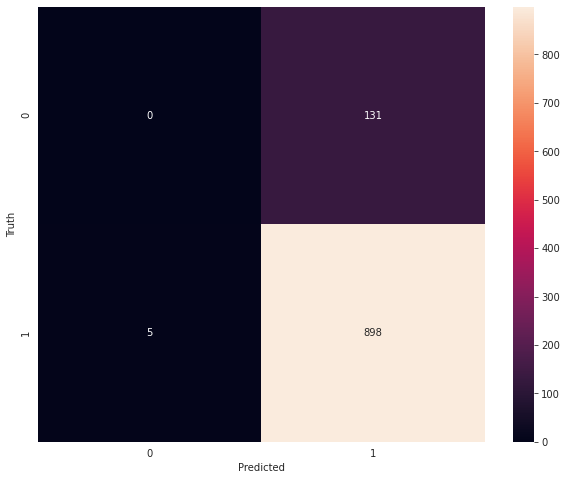

In [251]:
plt.figure(figsize=(10,8))
sns.heatmap(con_matrix_svm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Conclusion 2**

From our analysed deep learning modelling well work than the traditional algorithms such as logistic regression, random forest and support vector machine but among the traditional algorithm random forest has a quite good accuracy but it did not play with text data much as like deep learning algorithm like RNN, LSTM and Bidirectional LSTM. But LSTM, bidirectional could play with text data well than other algorithms.
